<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10198 entries, 0 to 10197
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   School_Type           10198 non-null  object
 1   Location              10196 non-null  object
 2   Infrastructure        10198 non-null  object
 3   Teaching_Staff        10198 non-null  object
 4   Gender                10198 non-null  object
 5   Caste                 10198 non-null  object
 6   Age                   10198 non-null  int64 
 7   Standard              10198 non-null  int64 
 8   Socioeconomic_Status  10198 non-null  object
 9   Dropout_Status        10198 non-null  object
 10  Dropout_Reason        5996 non-null   object
dtypes: int64(2), object(9)
memory usage: 876.5+ KB


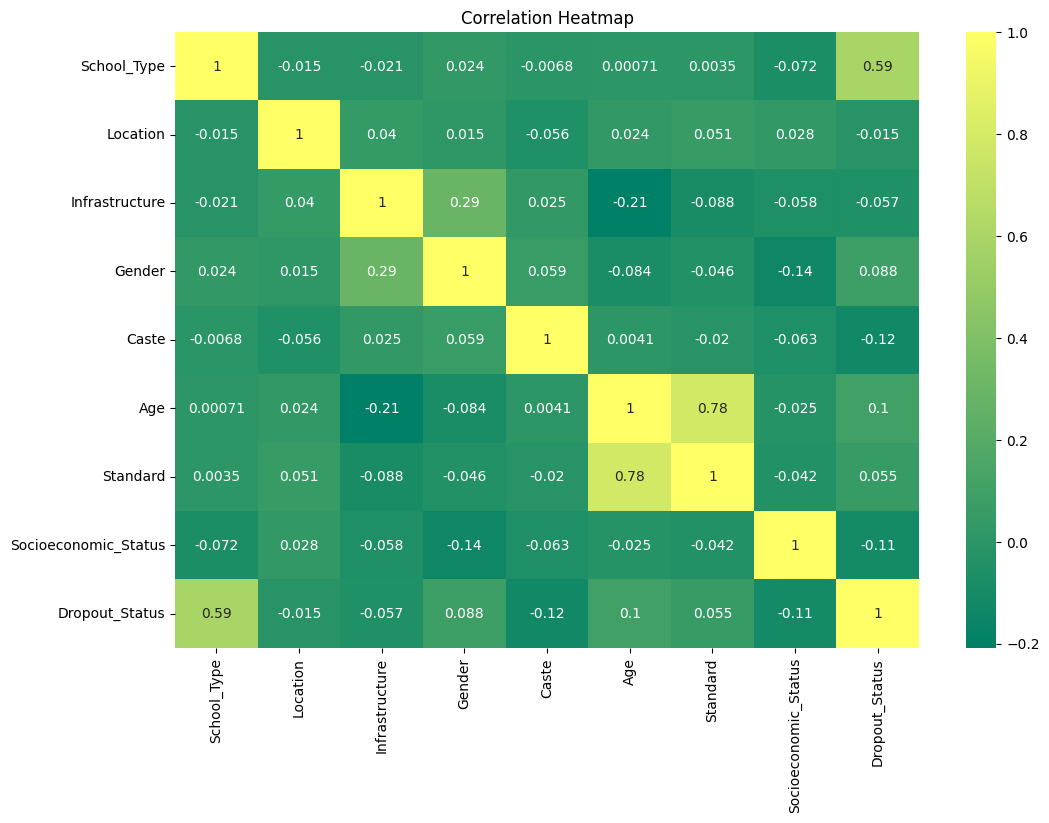

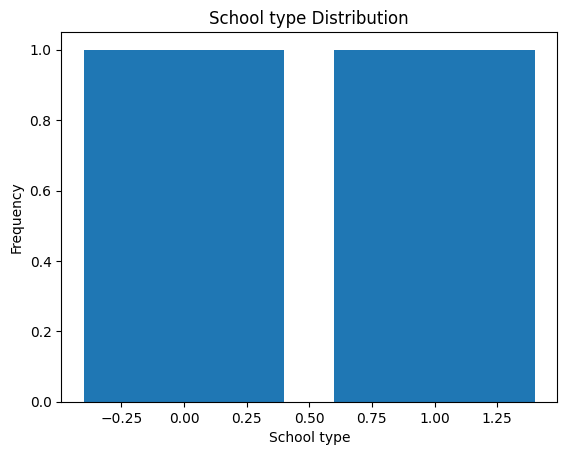

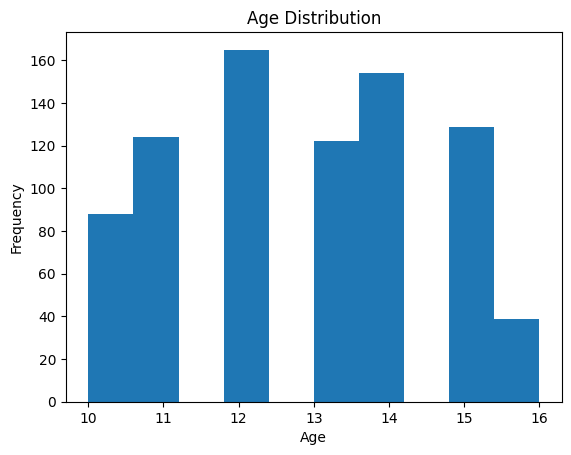

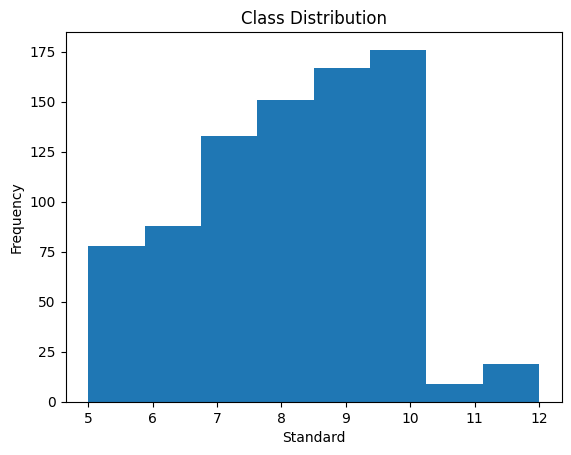


2. Random Forest

X_train: (656, 8)
X_test: (165, 8)
y_train: (656,)
y_test: (165,)
Accuracy: 0.9696969696969697
Precision Score: 1.0
Recall Score: 0.9411764705882353
F1 Score: 0.9696969696969697


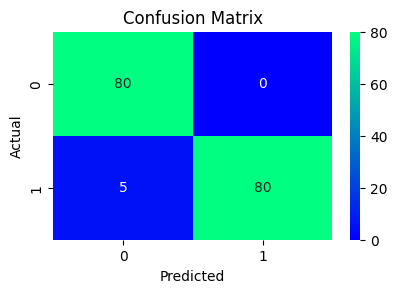


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       1.00      0.94      0.97        85

    accuracy                           0.97       165
   macro avg       0.97      0.97      0.97       165
weighted avg       0.97      0.97      0.97       165

ROC-AUC Score: 0.9994117647058823


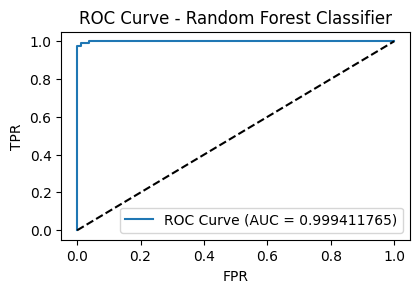

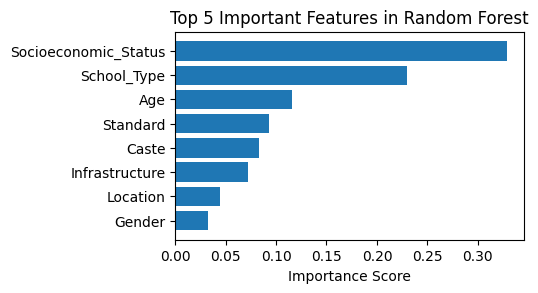

Optimal threshold  0.3888888888888889



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler


#reading csv and EDA
df=pd.read_csv("/content/SIH-Dataset.csv")
df.head()
df.tail()
df.shape
df.describe()
df.info()

#Finding  null values and replacing with medain value
df.isnull().sum()
df=df.drop_duplicates()
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].median())

#feature Engineering
df['Dropout_Status']=df['Dropout_Status'].map({'Dropout':0,'Enrolled':1})
cnt=(df['Dropout_Status']==1).sum()
cnt=(df['Dropout_Status']==0).sum()
df['Dropout_Status'].unique()
df=df.drop('Teaching_Staff',axis=1)
df=df.drop('Dropout_Reason',axis=1)

#Label Encoding
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#ploting
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.title("Correlation Heatmap")
plt.show()
print()

#bar-plot pf school-type
plt.bar(df['School_Type'], df['Dropout_Status'])
plt.title("School type Distribution")
plt.xlabel("School type")
plt.ylabel("Frequency")
plt.show()
print()

#bar-plot of age
plt.hist(df['Age'], bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
print()

#bar-plot of standard
plt.hist(df['Standard'], bins=8)
plt.title("Class Distribution")
plt.xlabel("Standard")
plt.ylabel("Frequency")
plt.show()
print()


#  Random Forest
standard_scale=StandardScaler()
x = df.drop(columns=['Dropout_Status'])
y = df['Dropout_Status']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.19999998, random_state=43
)
x_train = standard_scale.fit_transform(x_train)
x_test = standard_scale.transform(x_test)

print("2. Random Forest\n")
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

rf=RandomForestClassifier(n_estimators=360,random_state=45)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4.5, 2.7))
sns.heatmap(cm, annot=True, fmt='d', cmap='winter')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()

print(classification_report(y_test, y_pred))

y_prob = rf.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(4.5, 2.7))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.9f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()
print()

feature_importance = rf.feature_importances_
indices = np.argsort(feature_importance)[-9:]  # top 5 features

plt.figure(figsize=(4.5, 2.7))
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [x.columns[i] for i in indices])
plt.xlabel('Importance Score')
plt.title('Top 5 Important Features in Random Forest')
plt.show()

best_threshold=thresholds[(tpr-fpr).argmax()] #optimal soln
print("Optimal threshold ", best_threshold)
print()
